In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read 'student_depression.csv'

In [2]:
df = pd.read_csv('student_depression.csv')
df.head()

,id,Gender,Age,GPA,AP,SS,SD,DH,WH,FP,Depression
0,2,Male,33,8.97,5,2,5-6 hours,Healthy,3,1,1
1,8,Female,24,5.90,2,5,5-6 hours,Moderate,3,2,0
2,26,Male,31,7.03,3,5,Less than 5 hours,Healthy,9,1,0
3,30,Female,28,5.59,3,2,7-8 hours,Moderate,4,5,1
4,32,Female,25,8.13,4,3,5-6 hours,Moderate,1,1,0


### 2. Findthe number of observations and the number of variables

In [3]:
df.shape

(250, 11)

observations: 250, variables: 11

### 3. Find the mean and standard deviation of GPA 

In [4]:
df.describe()

,id,Age,GPA,AP,SS,WH,FP,Depression
count,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.00000,250.000000
mean,640.560000,25.576000,7.635040,3.024000,2.92800,7.064000,3.06000,0.564000
std,329.117584,5.030452,1.465388,1.436551,1.38074,3.768915,1.46183,0.496882
min,2.000000,18.000000,5.110000,1.000000,1.00000,0.000000,1.00000,0.000000
25%,367.750000,21.000000,6.195000,2.000000,2.00000,4.000000,2.00000,0.000000
50%,672.000000,25.000000,7.830000,3.000000,3.00000,8.000000,3.00000,1.000000
75%,904.500000,30.000000,8.917500,4.000000,4.00000,10.000000,4.00000,1.000000
max,1221.000000,39.000000,9.960000,5.000000,5.00000,12.000000,5.00000,1.000000


GPA mean: 7.64, std: 1.47

### 4. Five number summary for WH

Min: 0 <br>
Q1: 4 <br>
Q2: 8 <br>
Q3: 10 <br>
Max: 12

## 5. Find the number of male and female students

In [5]:
pd.crosstab(df['Gender'], 'freq')

col_0,freq
Gender,
Female,110
Male,140


Male: 140, Female: 110

### 6. Find a Frequency Table for Gender and DH with margin

In [6]:
pd.crosstab(df['Gender'], df['DH'], margins=True)

DH,Healthy,Moderate,Unhealthy,All
Gender,,,,
Female,31,41,38,110
Male,35,50,55,140
All,66,91,93,250


### 7. Find observations with Age>33 and AP=4

In [7]:
df[(df['Age']>33) & (df['AP']==4)]

,id,Gender,Age,GPA,AP,SS,SD,DH,WH,FP,Depression
157,770,Male,34,7.94,4,3,5-6 hours,Moderate,12,1,0


### 8. How many students suffer from "Depression"? 

In [8]:
df['Depression'].value_counts()

Depression
1    141
0    109
Name: count, dtype: int64

141 students suffer from 'depression'

### 9. Make a new variable "avg", which is the average of AP and FP

In [9]:
df['avg'] = df[['AP', 'FP']].mean(axis=1)
df.head()

,id,Gender,Age,GPA,AP,SS,SD,DH,WH,FP,Depression,avg
0,2,Male,33,8.97,5,2,5-6 hours,Healthy,3,1,1,3.0
1,8,Female,24,5.90,2,5,5-6 hours,Moderate,3,2,0,2.0
2,26,Male,31,7.03,3,5,Less than 5 hours,Healthy,9,1,0,2.0
3,30,Female,28,5.59,3,2,7-8 hours,Moderate,4,5,1,4.0
4,32,Female,25,8.13,4,3,5-6 hours,Moderate,1,1,0,2.5


### 10. Find the 75th, 90th, 95th, and 99th percentiles of GPA

In [10]:
pct = np.array([75,90,95,99])
np.percentile(df['GPA'],pct)

array([8.9175, 9.66  , 9.79  , 9.9402])

### 11. Find median and maximum of WH by Gender

In [11]:
df.groupby("Gender")["WH"].agg(["median", "max"])

,median,max
Gender,,
Female,7.0,12
Male,8.0,12


### 12. Make a histogram of GPA with red color

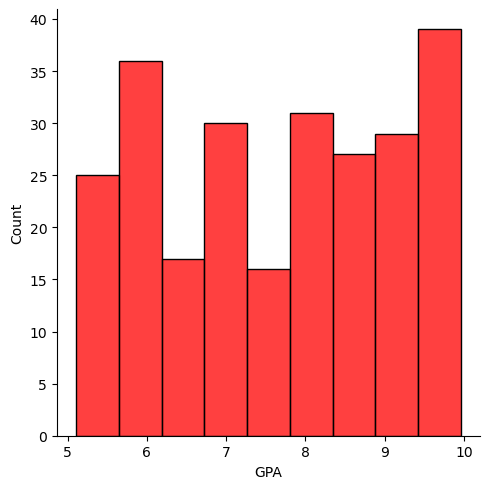

In [12]:
sns.displot(df['GPA'], color='red')
plt.show()

### 13. Make a scatterplot for Age(x-axis) and GPA(y-axis) by Depression

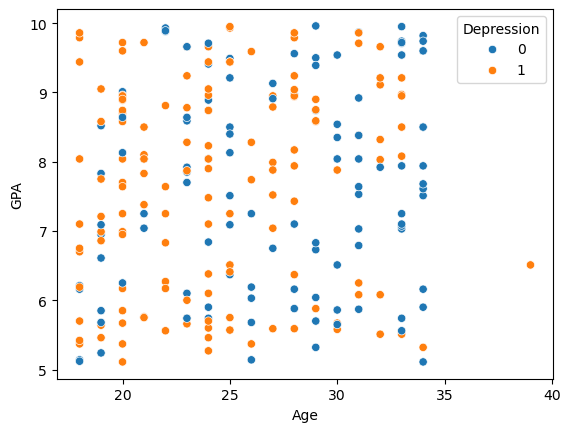

In [13]:
sns.scatterplot(x=df['Age'], y=df['GPA'], hue=df['Depression'])
plt.show()

### 14. Make boxplots for GPA by DH

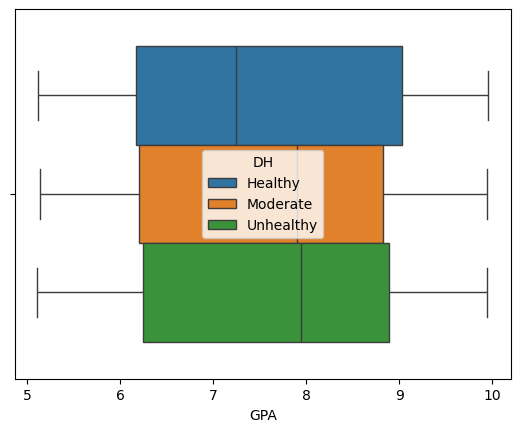

In [14]:
sns.boxplot(x='GPA', data=df, hue='DH')
plt.show()

### 15. Make a heatmap of the correlation matrix for AP,FP,WH,and SS

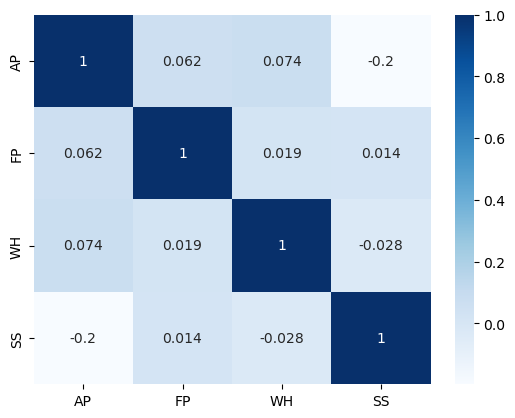

In [15]:
corr = df[['AP','FP','WH','SS']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()